In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [2]:
sites = {
    "solbosch": "https://umap.openstreetmap.fr/fr/datalayer/781335/",
    "erasme": "https://umap.openstreetmap.fr/fr/datalayer/646792/",
    "plaine": "https://umap.openstreetmap.fr/fr/datalayer/646726/"
}

In [3]:
dfs = []
for k in sites:
    df = gpd.read_file(sites[k], )
    df['campus'] = k
    dfs.append(df)
df = pd.concat(dfs, sort=False)
df = df.loc[:,['campus', 'name', 'geometry']].rename(columns={'name': 'building'})
#df = df.to_crs(epsg=31370)
df.sample(5)

,campus,building,geometry
14,solbosch,D,"POLYGON ((4.38491 50.81220, 4.38503 50.81204, ..."
26,erasme,11,"POLYGON ((4.26401 50.81374, 4.26416 50.81375, ..."
12,plaine,MA,"POLYGON ((4.39639 50.81813, 4.39644 50.81808, ..."
3,erasme,R,"POLYGON ((4.26177 50.81411, 4.26208 50.81414, ..."
25,erasme,14,"POLYGON ((4.26010 50.81379, 4.26117 50.81388, ..."


In [4]:
df = df.to_crs("EPSG:31370")
df.sample(5)

C:\Users\jlanderc\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,campus,building,geometry
24,erasme,2,"POLYGON ((142578.113 167009.213, 142621.322 16..."
53,solbosch,Y,"POLYGON ((151008.872 167110.134, 151023.749 16..."
32,solbosch,L,"POLYGON ((151058.671 166903.238, 151049.998 16..."
33,solbosch,M,"POLYGON ((150948.977 167070.298, 150959.195 16..."
9,plaine,LB,"POLYGON ((151897.055 167687.612, 151907.344 16..."


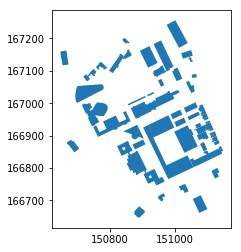

In [5]:
df.loc[df['campus']=='solbosch',:].plot()

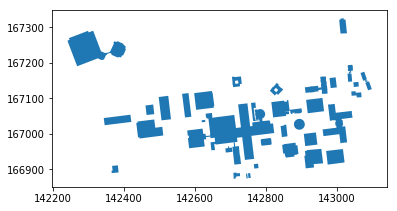

In [6]:
df.loc[df['campus']=='erasme',:].plot()

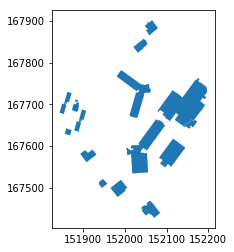

In [7]:
df.loc[df['campus']=='plaine',:].plot()